In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
Name0=[]
for dirname, _, filenames in os.walk('../input/animals10/raw-img'):
    Name0+=[dirname]

Name1=[]
for item in Name0:
    Name1+=[item[27:]]

Name2=[]
for item in Name1:
    if (item!=''):
        Name2+=[item]
                
Name3=sorted(Name2)
print(Name3)

[]


In [3]:
labels = open(r'C:\Users\RahulJavkar\AppData\Local\Programs\Python\Python312\Scripts\coco.names').read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
Name3E=['dog','horse','elephant','bird','cat','cow','sheep',]

Name3Ex=[]
Name3Eo=[]
for item in Name3E:
    if item not in labels:
        Name3Ex+=[item]
    elif item in labels:
        Name3Eo+=[item]
        
print(Name3Ex)
print(Name3Eo)

[]
['dog', 'horse', 'elephant', 'bird', 'cat', 'cow', 'sheep']


In [5]:
weights_path = r'C:\Users\RahulJavkar\AppData\Local\Programs\Python\Python312\Scripts\yolov3.weights'
configuration_path = r'C:\Users\RahulJavkar\AppData\Local\Programs\Python\Python312\Scripts\yolov3.cfg'

probability_minimum = 0.5
threshold = 0.3

In [6]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()

# Print unconnected output layers
unconnected_out_layers = network.getUnconnectedOutLayers()
print("Unconnected Out Layers:", unconnected_out_layers)

# Get the names of the output layers
layers_names_output = [layers_names_all[i - 1] for i in unconnected_out_layers]

print("Output Layers:", layers_names_output)

Unconnected Out Layers: [200 227 254]
Output Layers: ['yolo_82', 'yolo_94', 'yolo_106']


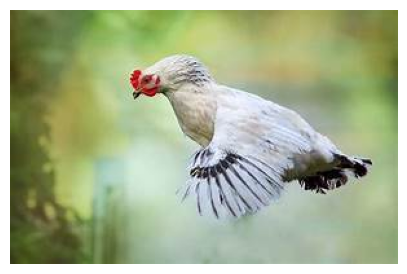

In [7]:
image_input = cv2.imread(r'D:\animal\raw-img\bird/1044.jpeg')

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network.setInput(blob)
output_from_network = network.forward(layers_names_output)
np.random.seed(42)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ImagePath(path):
    bounding_boxes = []
    confidences = []
    class_numbers = []
    
    image_input = cv2.imread(path)
    blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416, 416), swapRB=True, crop=False)
    blob_to_show = blob[0,:,:,:].transpose(1, 2, 0)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)
    h, w = image_input.shape[:2]

    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]
            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    if len(results) > 0:
        for i in results.flatten():
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
            colour_box_current = [int(j) for j in colours[class_numbers[i]]]
            cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                          colour_box_current, 5)
            text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])
            cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, colour_box_current, 2)

    labels2 = []
    for item in sorted(set(class_numbers)):
        labels2.append(labels[item])

    # Plot the image with the bounding boxes and labels
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

    title_str = ', '.join(labels2)
    plt.title(title_str)

    plt.axis('off')  # Hide the axis
    plt.show()

    return labels2




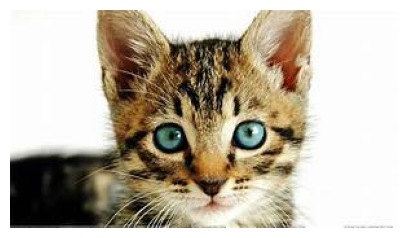

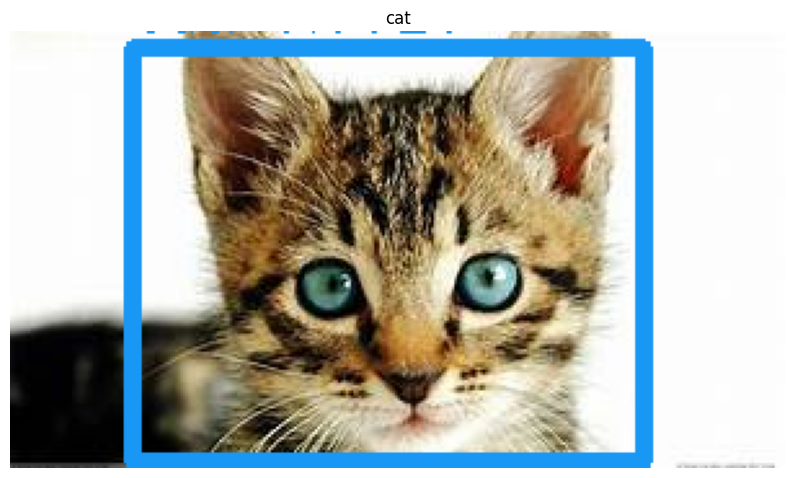

['cat']

In [10]:
path= r'D:\animal/raw-img/cat/1001.jpeg'
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

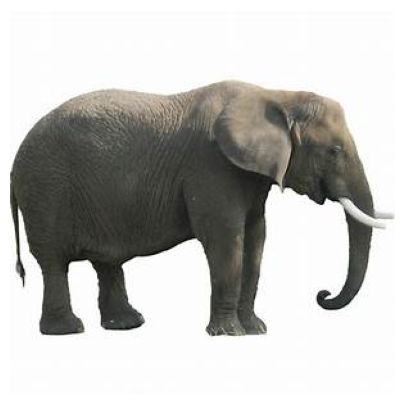

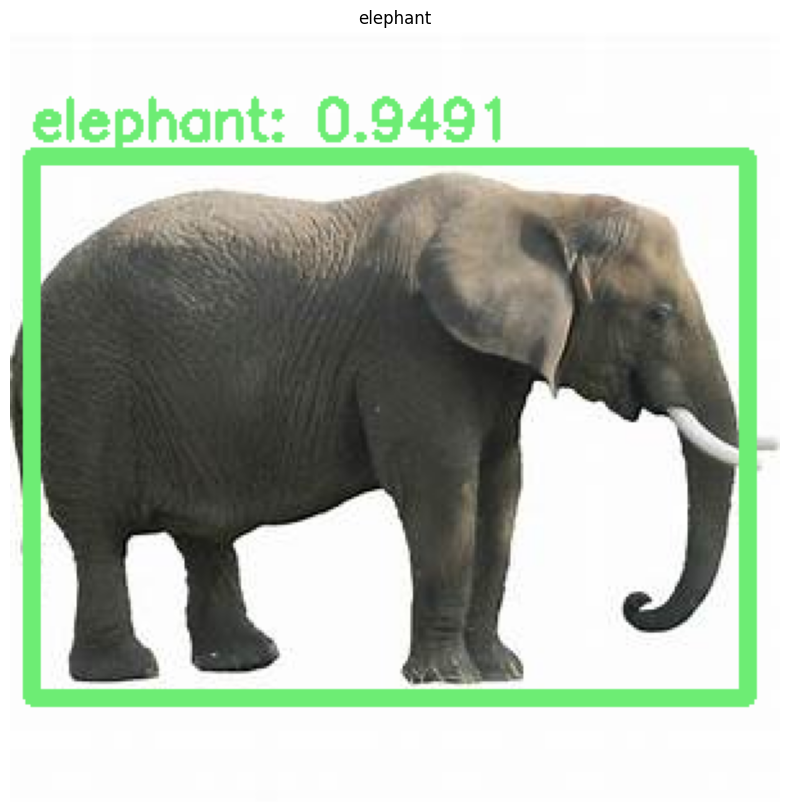

['elephant']

In [11]:
path= r'D:\animal/raw-img/elephant/OIP--NEqn4JVnn251xGu7ss4bQHaHa.jpeg'
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

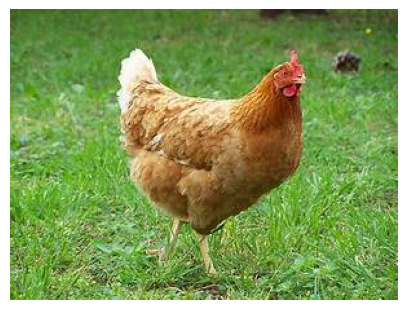

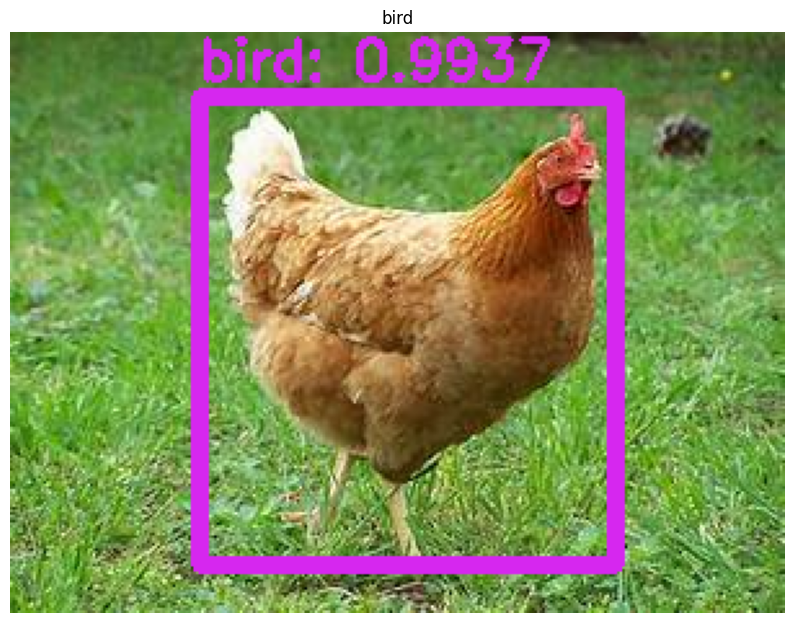

['bird']

In [12]:
path= r'D:\animal/raw-img/bird/64.jpeg'
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

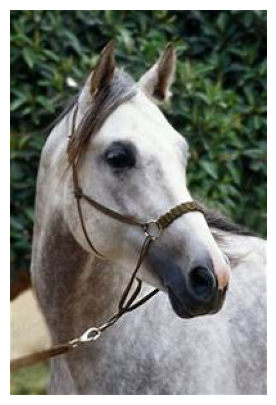

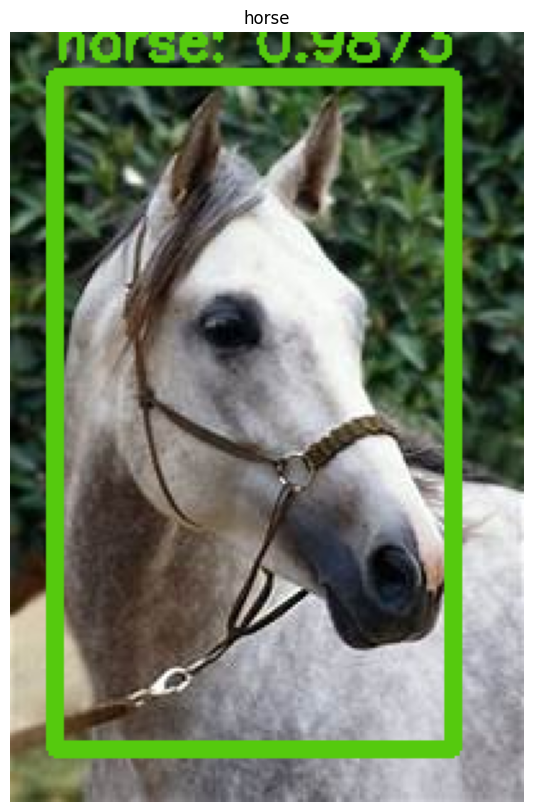

['horse']

In [13]:
path= r'D:\animal/raw-img/horse/OIP-_AYrNh004hMc_e2Q77WUJQHaLH.jpeg'
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

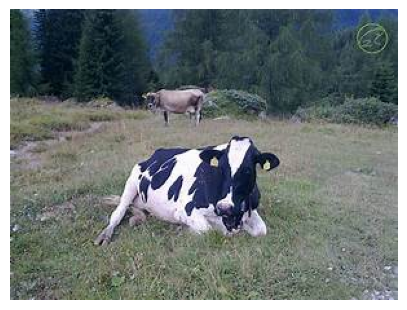

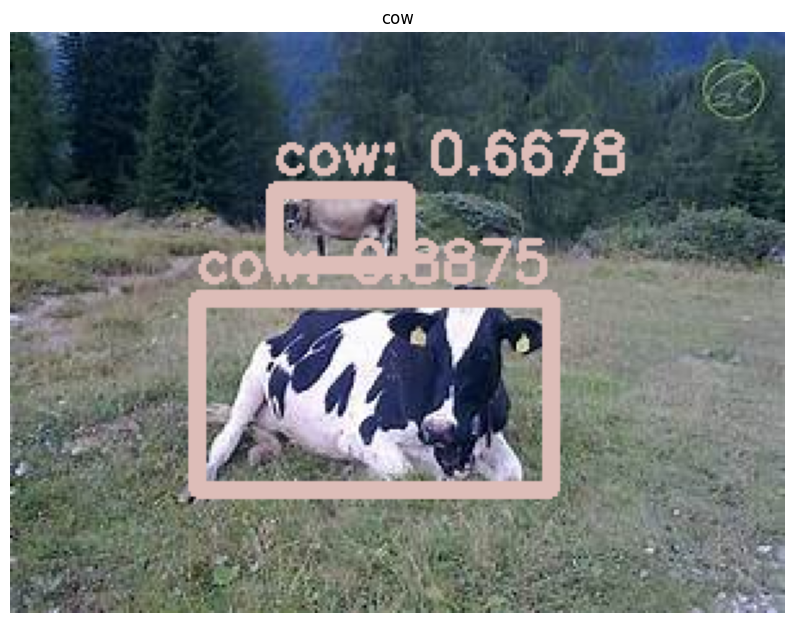

['cow']

In [14]:
path= r'D:\animal/raw-img/cow\OIP-_JAjp2YUwtnIMkoYOjPRKgHaFj.jpeg'
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

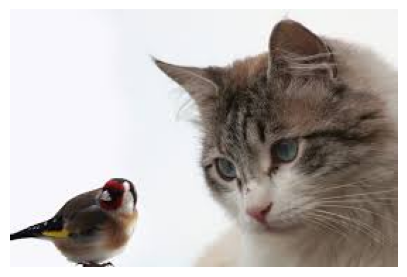

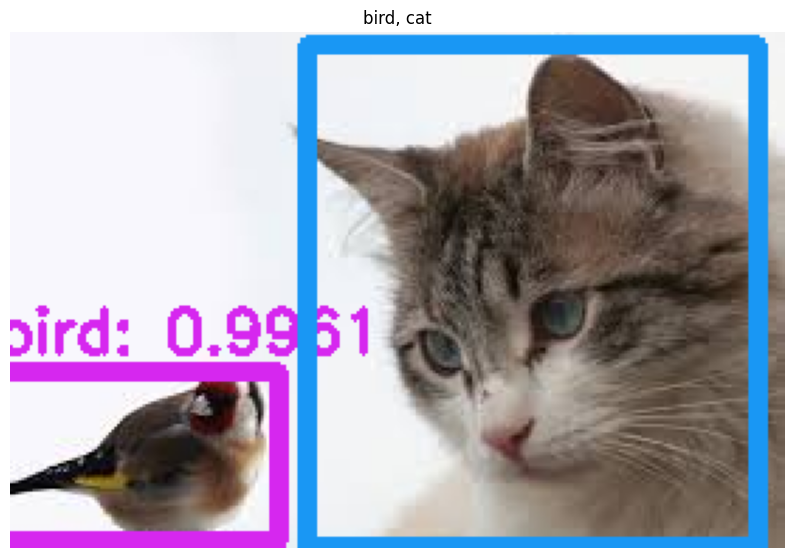

['bird', 'cat']

In [16]:
path= r"D:\animal\raw-img\mix\bircat.jpeg"
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)

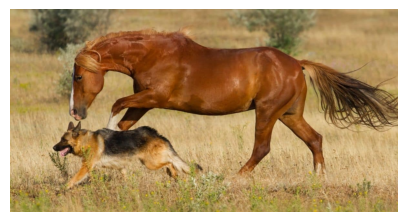

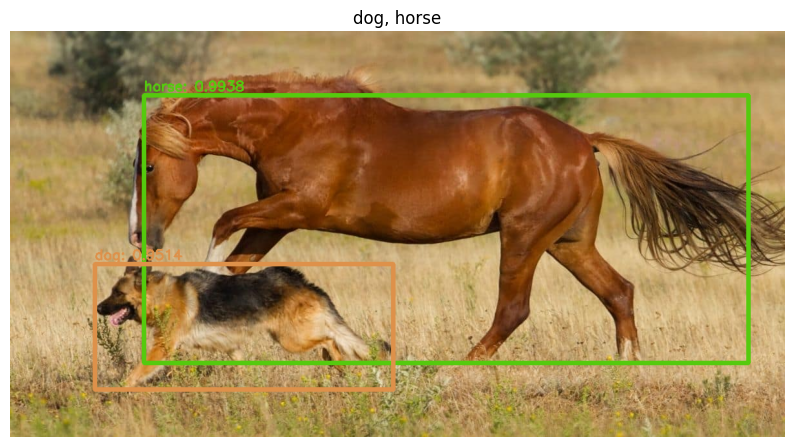

['dog', 'horse']

In [17]:
path= r"D:\animal\raw-img\mix\hordog.jpg"
image_input = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
ImagePath(path)